# Assignment 1: Matrix Inversion

In [3]:
from LibPython.Library import MatInv, Eigen
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)
m  = MatInv()
e = Eigen()

## Q1

In [2]:
A = [[1.0,-1.0,4.0,0.0,2.0,9.0], [0.0,5.0,-2.0,7.0,8.0,4.0], [1.0,0.0,5.0,7.0,3.0,-2.0], [6.0,-1.0,2.0,3.0,0.0,8.0], [-4.0,2.0,0.0,5.0,-5.0,3.0], [0.0,7.0,-1.0,5.0,4.0,-2.0]]
b = [19.0, 2.0, 13.0, -7.0, -9.0, 2.0]
A = np.array(A)
b = np.array(b)
print("A:")
print(A)
print("\nb:")
print(b)

A:
[[ 1. -1.  4.  0.  2.  9.]
 [ 0.  5. -2.  7.  8.  4.]
 [ 1.  0.  5.  7.  3. -2.]
 [ 6. -1.  2.  3.  0.  8.]
 [-4.  2.  0.  5. -5.  3.]
 [ 0.  7. -1.  5.  4. -2.]]

b:
[19.  2. 13. -7. -9.  2.]


In [3]:
# These converge
print("Gauss Jordan solution: "+str(m.gauss_jordan(A, b)))
inv_gj = m.inverse(A, m.gauss_jordan)
print("Gauss Jordan Inverse*Matrix:")
print(np.dot(A, inv_gj))
inv_lu = m.inverse(A, m.lu_decom)
print("\nLU solution: "+str(m.lu_decom(A, b)))
print("LU Decomposition Inverse*Matrix:")
print(np.dot(A, inv_lu))
# Inverses of these do not, each will give out an error which you can see by commenting out the others
print("\nJacobi solution: "+str(m.jacobi(A, b)))
inv_jb = m.inverse(A, m.jacobi)
print("\nGauss Siedel solution: "+str(m.gauss_siedel(A, b)))
inv_gs = m.inverse(A, m.gauss_siedel)
print("\nConjugate Gradient solution: "+str(m.conjugate_gradient(A, b)))
inv_cg = m.inverse(A, m.conjugate_gradient)

Gauss Jordan solution: [-1.762  0.896  4.052 -1.617  2.042  0.152]
Gauss Jordan Inverse*Matrix:
[[ 1.  0.  0.  0.  0. -0.]
 [-0.  1.  0.  0.  0.  0.]
 [-0.  0.  1.  0.  0. -0.]
 [ 0.  0.  0.  1. -0. -0.]
 [-0. -0. -0. -0.  1.  0.]
 [-0. -0.  0.  0.  0.  1.]]

LU solution: [-1.762  0.896  4.052 -1.617  2.042  0.152]
LU Decomposition Inverse*Matrix:
[[ 1. -0. -0. -0. -0. -0.]
 [ 0.  1. -0. -0. -0.  0.]
 [ 0.  0.  1. -0.  0. -0.]
 [ 0.  0.  0.  1. -0. -0.]
 [ 0. -0. -0. -0.  1.  0.]
 [ 0. -0. -0.  0.  0.  1.]]


Exception: Did not converge, make sure coefficient matrix is diagonal heavy

## Q2

In [4]:
A = [[2.0,-1.0,0.0,0.0,0.0,0.0], [-1.0,4.0,-1.0,0.0,-1.0,0.0], [0.0,-1.0,4.0,0.0,0.0,-1.0], [0.0,0.0,0.0,2.0,-1.0,0.0], [0.0,-1.0,0.0,-1.0,4.0,-1.0], [0.0,0.0,-1.0,0.0,-1.0,4.0]]
b = [-5/2,2/3,3,-4/3,-1/3,5/3]
A = np.array(A)
b = np.array(b)
print("A:")
print(A)
print("\nb:")
print(b)

A:
[[ 2. -1.  0.  0.  0.  0.]
 [-1.  4. -1.  0. -1.  0.]
 [ 0. -1.  4.  0.  0. -1.]
 [ 0.  0.  0.  2. -1.  0.]
 [ 0. -1.  0. -1.  4. -1.]
 [ 0.  0. -1.  0. -1.  4.]]

b:
[-2.5    0.667  3.    -1.333 -0.333  1.667]


LU solution: [-1.213  0.073  0.925 -0.71  -0.086  0.626]

Jacobi solution: [-1.213  0.073  0.925 -0.71  -0.086  0.626]


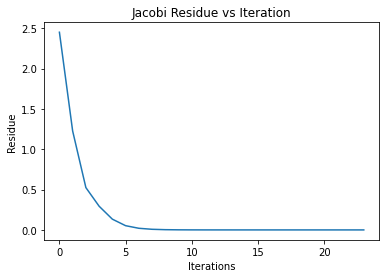

Jacobi inverse:
[[0.587 0.174 0.05  0.029 0.057 0.027]
 [0.174 0.347 0.1   0.057 0.114 0.054]
 [0.05  0.1   0.297 0.027 0.054 0.088]
 [0.029 0.057 0.027 0.587 0.174 0.05 ]
 [0.057 0.114 0.054 0.174 0.347 0.1  ]
 [0.027 0.054 0.088 0.05  0.1   0.297]]


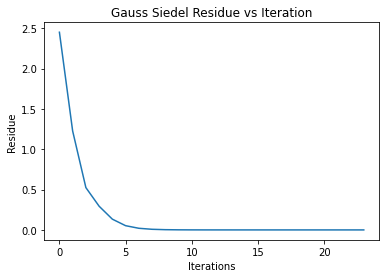

Gauss Siedel inverse
[[0.587 0.174 0.05  0.029 0.057 0.027]
 [0.174 0.347 0.1   0.057 0.114 0.054]
 [0.05  0.1   0.297 0.027 0.054 0.088]
 [0.029 0.057 0.027 0.587 0.174 0.05 ]
 [0.057 0.114 0.054 0.174 0.347 0.1  ]
 [0.027 0.054 0.088 0.05  0.1   0.297]]


In [5]:
print("LU solution: "+str(m.lu_decom(A, b)))
print("\nJacobi solution: "+str(m.jacobi(A, b)))
# These converge
inv_jb, res_jb = m.inverse(A, m.jacobi, residue=True)
plt.title("Jacobi Residue vs Iteration")
plt.plot(res_jb[1])
plt.xlabel("Iterations")
plt.ylabel("Residue")
plt.show()
print("Jacobi inverse:")
print(inv_jb)
plt.close()
plt.title("Gauss Siedel Residue vs Iteration")
inv_gs, res_gs = m.inverse(A, m.gauss_siedel, residue=True)
plt.plot(res_gs[1])
plt.xlabel("Iterations")
plt.ylabel("Residue")
plt.show()
print("Gauss Siedel inverse")
print(inv_gs)
plt.close()
# This does not converge
# inv_cg = m.inverse(A, m.conjugate_gradient)

## Q3

In [1]:
from LibPython.Library import UnloadedMatrix

In [4]:
a = UnloadedMatrix(3, [[0,1], [1,0]], 0.2)
b = m.inverse(a, m.conjugate_gradient)
print("Matrix to be diagonalized:")
print(a)
print("\nDiagonalized:")
print(b)
print("\nChecking diagonalization:")
print(a@b)

Matrix to be diagonalized:
UnloadedMatrix([[-0.96, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0],
		[0.5, -0.96, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0],
		[0.0, 0.5, -0.96, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0],
		[0.5, 0.0, 0.0, -0.96, 0.5, 0.0, 0.5, 0.0, 0.0],
		[0.0, 0.5, 0.0, 0.5, -0.96, 0.5, 0.0, 0.5, 0.0],
		[0.0, 0.0, 0.5, 0.0, 0.5, -0.96, 0.0, 0.0, 0.5],
		[0.0, 0.0, 0.0, 0.5, 0.0, 0.0, -0.96, 0.5, 0.0],
		[0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, -0.96, 0.5],
		[0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, -0.96]])

Diagonalized:
[[-1.418 -0.361  0.241 -0.361  0.483  0.825  0.241  0.825  0.859]
 [-0.361 -1.176 -0.361  0.483  0.464  0.483  0.825  1.101  0.825]
 [ 0.241 -0.361 -1.418  0.825  0.483 -0.361  0.859  0.825  0.241]
 [-0.361  0.483  0.825 -1.176  0.464  1.101 -0.361  0.483  0.825]
 [ 0.483  0.464  0.483  0.464 -0.076  0.464  0.483  0.464  0.483]
 [ 0.825  0.483 -0.361  1.101  0.464 -1.176  0.825  0.483 -0.361]
 [ 0.241  0.825  0.859 -0.361  0.483  0.825 -1.418 -0.361  0.241]
 [ 0.825  1.101  0.825

## Extra: Linear Regression

In [26]:
from LibPython.Library import Statistics
s = Statistics()

In [27]:
data = np.genfromtxt("vol.csv", delimiter=",")
x = data[:, 0]
y = data[:, 1]
yerr = data[:, 2]
y = np.log(y)
yerr = np.log(yerr)

In [28]:
yfit = s.linear_regression(x, y, yerr)[0]


In [29]:
from matplotlib import pyplot as plt

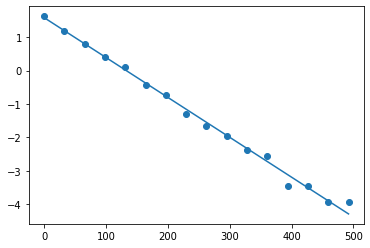

In [30]:
plt.scatter(x, y)
plt.plot(x, yfit)

In [ ]:
s.chisq(y, yfit, yerr)